In [1]:
import numpy as np
import pandas as pd 
from scipy.integrate import quad
import matplotlib.pyplot as plt 
import math

## $e^+e^- \to \mu^+ \mu^- scattering$

We start by computing the differential cross section of the process $e^+e^-\to\mu^+\mu^-$ at tree level, from which we will proceed to generate the events.<br>
The Feynman diagram of the process is the s-channel diagram
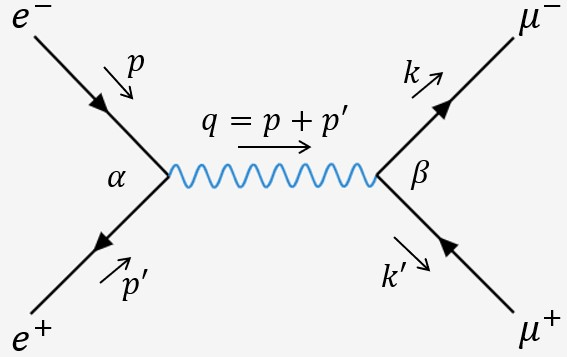


The corresponding amplitude reads $$\mathcal{M} = \frac{e^2}{q}(\bar{v}(p')\,\gamma^{\alpha}\,u(p))\,(\bar{u}(k)\,\gamma_{\alpha}\,v(q))\,.$$

Since the cross section $\sigma$ is proportional to the absolute square of $\mathcal{M}$ and we are interested in the unpolarized cross section, we average over the initial states and sum over the final states to get 

$$|\bar{\mathcal{M}}|^2 = \frac{1}{4}\sum_{spin}|\mathcal{M}|^2 = \frac{e^4}{4q^2}\mathrm{Tr}\{({p\!\!/\,'}-m_e)\,\gamma^{\alpha}\,({p\!\!/\,}+m_e)\,\gamma^{\beta}\}\,\mathrm{Tr}\{({k\!\!/\,}+m_{\mu})\,\gamma_{\beta}\,({k\!\!/\,'}-m_{\mu})\,\gamma_{\alpha}\}\,.$$

The trace calculations can be performed using the known relations descending from the Clifford algebra of the $\gamma$ matrices. Moreover, the experimental conditions of the beam  $\sqrt{s} \approx 2m_{\mu} >> m_e$ allow us to neglect the electron mass, finding the (approximate) result 

$$|\bar{\mathcal{M}}|^2 = \frac{8e^4}{q^2} [(p \cdot k)(p' \cdot k') + (p \cdot k')(p' \cdot k)+m^2_{\mu}(p \cdot p')]\,.$$

From the absolute square we can compute the differential cross section for the production of a $\mu^-$ with momentum $\vec{k}$ as

$$\frac{d \sigma}{d \Omega} = \frac{1}{2s}\frac{|\vec{k}|}{16\pi^2\sqrt{s}}\,|\bar{\mathcal{M}}|^2.$$

Studying the process in the center of mass frame (COM), where the kinematics is simpler, we get

$$
\left( \frac{d\sigma}{d\Omega} \right)_{COM} (\sqrt{s}, \theta) = \frac{\alpha^2}{4s}\sqrt{1-4\frac{m_{\mu}^{2}}{s}} \left[ \left( 1 + 4\frac{m_{\mu}^{2}}{s} \right) + \left( 1 - 4\frac{m_{\mu}^{2}}{s} \right) \cos^{2}{\theta} \right]
$$

where $\alpha$ is the coupling constant, $\sqrt{s}$ is the center of mass energy, set by the experiment design, and $E_{\mu}$ is the energy of the produced muon in the COM frame.

In [2]:
# Here are defined the constants and the variables that will be used in the following section
# Natural units are used (c = 1)

alpha = 1/137.036 # coupling constant
me = 0.511 # MeV mass of the electron
mmu = 105.66 # MeV mass of the muon
factor = 10**6/0.00257 # conversion factor MeV^-2 / nanobarn

s = 212 **2 # Mev^2 this is the minimum energy to initiate the reaction
E = np.sqrt(s) / 2 # Mev this is the energy of the final muon
p = np.sqrt(E**2 - mmu**2) # MeV this is the momentum of the final muon

Text(0.5, 1.0, 'Differential cross section as a function of $\\theta$ for a fixed COM energy $\\sqrt{s}$ = 212 MeV')

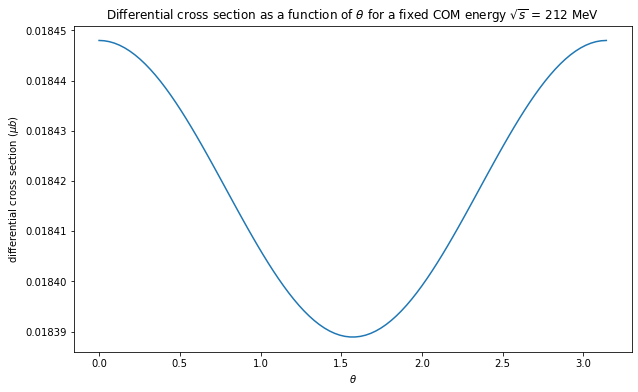

In [3]:
# Initialization of the differential cross section function

A = alpha**2 / (4*s)
B = np.sqrt(1 - mmu**2/E**2)
C = 1 + mmu**2 / E**2
D = 1 - mmu**2 /E**2

diff_cross_section = lambda x: A * B * (C + D * np.cos(x)**2)

# Plot of the differential cross section 

x = np.linspace(0, np.pi, 100)  
y = diff_cross_section(x)*factor

fig, ax = plt.subplots(figsize=(10, 6)) 
ax.plot(x, y)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'differential cross section ($\mu b$)')
ax.set_title(r'Differential cross section as a function of $\theta$ for a fixed COM energy $\sqrt{s}$ = 212 MeV')

### Probability Density Function of $\theta$ in COM.

Text(0.5, 1.0, '$p(\\theta)$ for $\\sqrt{s} = 212\\,MeV$')

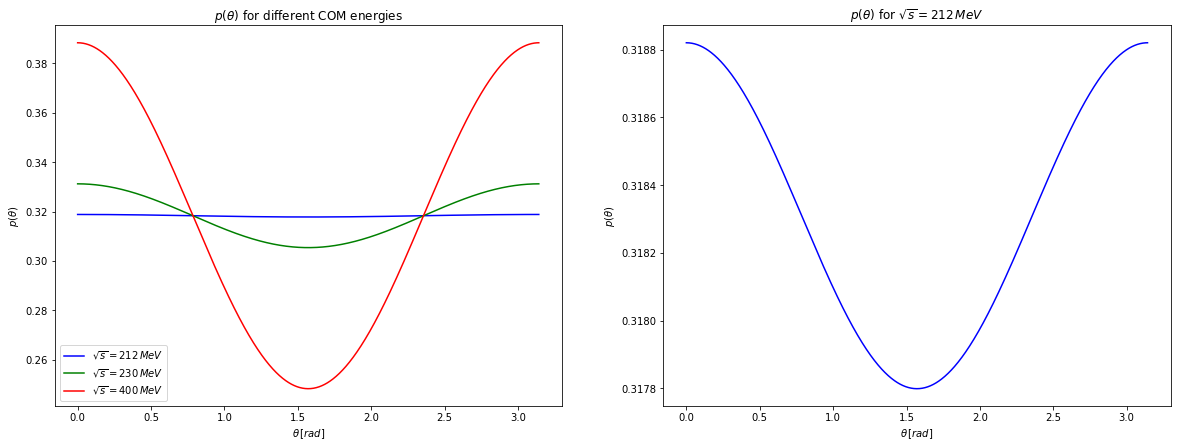

In [4]:
#define function for the PDF of theta

def PDF_theta_COM(E_CM, theta):
    A = alpha**2 / (4*E_CM**2)
    B = np.sqrt(1 - 4*mmu**2/E_CM**2)
    C = 1 + 4*mmu**2/E_CM**2
    D = 1 - 4*mmu**2/E_CM**2
    sigma = A * B * (C + D * (np.cos(theta))**2)
    sigma_tot = A * B * ((3/2 + 2*mmu**2/E_CM**2) * math.pi)
    return sigma/sigma_tot

theta_grid = np.linspace(0, math.pi, 1000)

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(20, 7))

ax1.plot(theta_grid, PDF_theta_COM(212, theta_grid), 'b', theta_grid, PDF_theta_COM(230, theta_grid), 'g', theta_grid, PDF_theta_COM(400, theta_grid), 'r')
ax1.set_xlabel(r'$\theta\,[rad]$')
ax1.set_ylabel(r'$p(\theta)$')
ax1.set_title(r'$p(\theta)$ for different COM energies')
ax1.legend((r'$\sqrt{s} = 212\,MeV$', r'$\sqrt{s} = 230\,MeV$', r'$\sqrt{s} = 400\,MeV$'))

ax2.plot(theta_grid, PDF_theta_COM(212, theta_grid), 'b')
ax2.set_xlabel(r'$\theta\,[rad]$')
ax2.set_ylabel(r'$p(\theta)$')
ax2.set_title(r'$p(\theta)$ for $\sqrt{s} = 212\,MeV$')

Text(0.5, 1.0, 'PDF of $\\phi$')

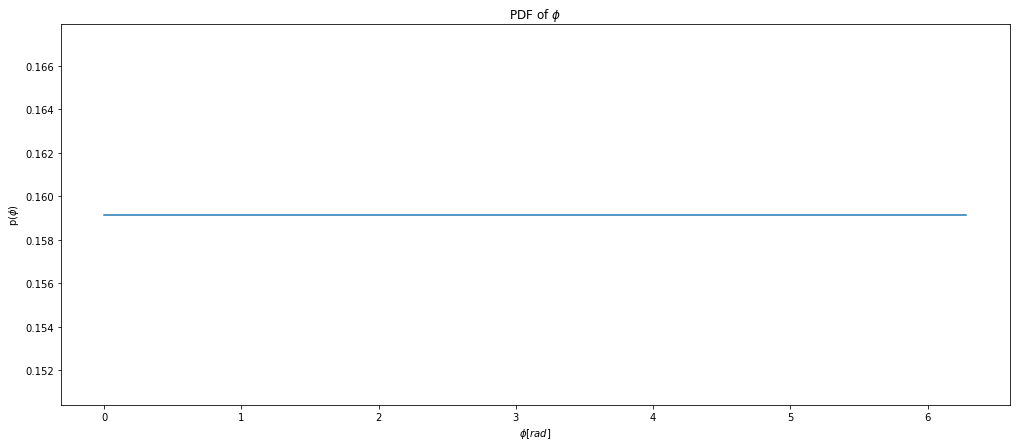

In [5]:
phi_grid = np.linspace(0, 2*math.pi, 1000)

plt.subplots(figsize=(17,7))
plt.plot(phi_grid, 1/(2*math.pi)*np.full(phi_grid.size, 1))
plt.xlabel(r'$\phi [rad]$')
plt.ylabel(r'p($\phi$)')
plt.title('PDF of $\phi$')

### Events generation

In this section the goal is the simulation of the $e^{+}e^{-} \rightarrow \mu^{+}\mu^{-}$ scattering in the center of mass frame (COM). The events obtained will be subsequently boosted to obtain the muons energies in the laboratory frame (LAB).  
To obtain the components of the muons momenta in the COM frame it is necessary to simulate the scattering angles $\theta$ and $\phi$. According to the symmetry of the problem, the angle $\phi$ will be generated following a uniform distribution in the range [0, $2\pi$], while the angle $\theta$ will be generated following the distribution described by the differential cross section of the scattering in the range [0, $\pi$]. 



**Generation of the $\theta$ angle using the accept reject method**

The differential cross section of the process is described by the following equation:
    
$$
\left( \frac{d\sigma}{d\Omega} \right)_{COM} = \frac{\alpha^2}{4s}\sqrt{1-\frac{m_{\mu}^{2}}{E^{2}_{\mu}}} \left[ \left( 1 + \frac{m_{\mu}^{2}}{E^{2}_{\mu}} \right) + \left( 1 - \frac{m_{\mu}^{2}}{E^{2}_{\mu}} \right) \cos^{2}{\theta} \right]
$$

where $\alpha$ is the coupling constant, $\sqrt{s}$ is the center of mass energy and $m_{\mu}$ and $E_{\mu}$ are the mass and the energy of the produced muon.

The $\theta$ angles have to be generated following this expression and the most recommanded method to do this would be the inverse transform method, according to which the events are generated using the inverse of the cumulative distribution function (CDF). 
However, when the CDF is calculated as the renormalized integral of the differential cross section $\left( \frac{d\sigma}{d\Omega} \right)_{COM}$, an expression proportional to the following is obtained:

$$
F(\theta) \sim \frac{\alpha^2}{4s}\sqrt{1-\frac{m_{\mu}^{2}}{E^{2}_{\mu}}} \left[ \left(  \frac{3}{2} + \frac{1}{2} \frac{m_{\mu}^{2}}{E^{2}_{\mu}} \right) \theta + \frac{1}{2} \left( 1 - \frac{m_{\mu}^{2}}{E^{2}_{\mu}} \right) \sin{2\theta} \right]
$$

Unfortunately this expression is not analitically invertible, therefore it is necessary to use an alternative method to obtain the random $\theta$.
The method implemented in the following is a sampling method called Accept-Reject Method. 

The Accept-Reject method consists in sampling a probability density function. For this reason the differential cross section expression has to be renormalized, so that it expresses the probability to obtain a muon at a certain angle $\theta$. 
In the following block the renormalization is performed dividing the differential cross section by the factor obtained integrating the same function in the range of interest [0, $\pi$]:

$$
 \int_{0}^{\pi} \left( \frac{d\sigma}{d\Omega} \right)_{COM} \,d\theta 
$$

The integral is performed in the following block using the function integrate.quad() of the scipy library. 

Text(0.5, 1.0, 'Probability density function of theta calculated in the COM frame')

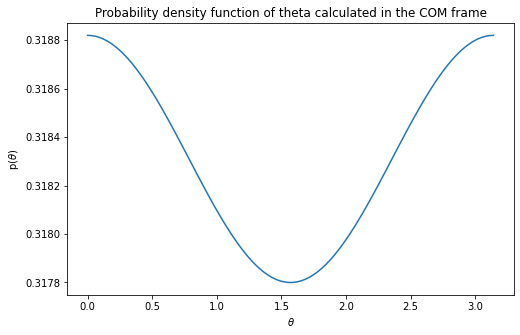

In [6]:
# Here I calculate the integral of the differential cross section function to obtain its norm
norm, err = quad(diff_cross_section, 0, np.pi)

x = np.linspace(0, np.pi, 100)  
y = diff_cross_section(x) / norm # dividing the function by the normalization factor I obtain a probability density

# Plot of the pdf
fig, ax = plt.subplots(figsize=(8, 5)) 
ax.plot(x, y)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'p($\theta$)')
ax.set_title('Probability density function of theta calculated in the COM frame')

In the following block the Accept-Reject method is implemented. Couples of random numbers $(h_i, v_i)$ are generated uniformely in the ranges: $h_i \in [0, \pi]$ and $v_i \in [0, pdf(\theta)_{max}]$. Then $h_i$ is accepted as a good value only when $v_i<pdf(h_i)$.
 

Text(0.5, 1.0, 'Simulated $\\theta$ distribution')

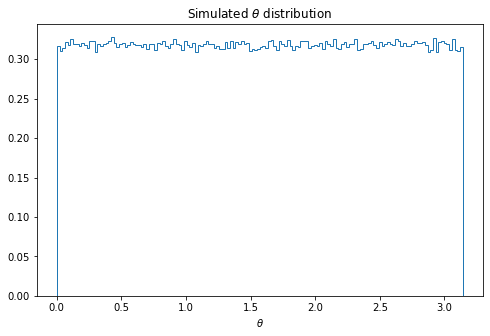

In [7]:
up_lim = np.max(y) # max value of the theta pdf

# Accept-reject method:
n = 1000000 
# Points generated uniformly along the horizontal axis, in [0, pi]
h = np.random.uniform(0, np.pi, n)
# Points generated uniformly along the vertical axis, in [0, up_lim]
v = np.random.uniform(0, up_lim, n)
# we only accept the values along the horizontal axis that corresponds to points along the vertical axes that are below pdf(h)
theta = h[v < diff_cross_section(h)/norm]

# Plot of the theta distribution:
fig, ax = plt.subplots(figsize=(8, 5)) 
bin_counts, bin_edges, _ = ax.hist(theta, bins=150, histtype='step', density=True)
#ax.set_ylim(0.27, 0.35)
ax.set_xlabel(r'$\theta$')
ax.set_title(r'Simulated $\theta$ distribution')


At this point an angle $\phi$ has to be generated in correspondance of every angle $\theta$. Given the geometry of the process, which is symmetric around the z axis, the angle $\phi$ will be uniformely distributed in the range [0, 2$\pi$].

Text(0.5, 1.0, 'Simulated $\\phi$ distribution')

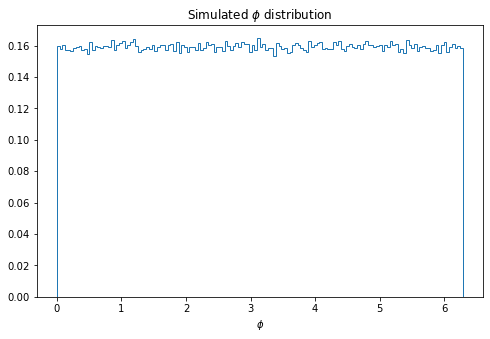

In [8]:
phi = np.random.uniform(0, 2*np.pi, len(theta))

fig, ax = plt.subplots(figsize=(8, 5)) 
bin_counts, bin_edges, _ = ax.hist(phi, bins=150, histtype='step', density=True)
ax.set_xlabel(r'$\phi$')
ax.set_title(r'Simulated $\phi$ distribution')

A this point the components of the muon momenta in the COM frame are obtained projecting the total muon momenta using the angles $\theta$ and $\phi$ just obtained.
The modulus of the muon momenta in the COM frame is obtained as: 

$$
p_{\mu} = \sqrt{E_{\mu}^2 - m_{\mu}^2}, \qquad E_{\mu} = \frac{\sqrt{s}}{2}
$$

The momentum components are given by the following expressions:

$$
\begin{cases}
      p_x = |\vec{p}| \sin(\theta) \cos(\phi)\\
      p_y = |\vec{p}| \sin(\theta) \sin(\phi)\\
      p_z = |\vec{p}| \cos(\theta)
    \end{cases}\,.
$$

In the Data Frame are outlined the components of the momentum, the modulus of the momentum and the energy of the final muon in the COM frame. 
The distribution obtained for each momentum component is plotted below.

In [9]:
# The data frame reports the momentum components of the final muons

def components(theta, phi, p):
    
    px1 = p * np.sin(theta) * np.cos(phi)
    py1 = p * np.sin(theta) * np.sin(phi)
    pz1 = p * np.cos(theta)
    ptot1 = np.sqrt(px1**2 + py1**2 + pz1**2)
    Emu1 = np.sqrt(ptot1**2 + mmu**2)
    
    px2 = p * np.sin(np.pi - theta) * np.cos(np.pi + phi)
    py2 = p * np.sin(np.pi - theta) * np.sin(np.pi + phi)
    pz2 = p * np.cos(np.pi - theta)
    ptot2 = np.sqrt(px2**2 + py2**2 + pz2**2)
    Emu2 = np.sqrt(ptot2**2 + mmu**2)
    
    events = {'px1 (MeV)' : px1, 'py1 (MeV)' : py1, 'pz1 (MeV)' : pz1, 'p1 (MeV)' : ptot1, 'E1 (MeV)' : Emu1, 'px2 (MeV)' : px2, 'py2 (MeV)' : py2, 'pz2 (MeV)' : pz2, 'p2 (MeV)' : ptot2, 'E2 (MeV)' : Emu2}
    return events

dataset_com = pd.DataFrame(components(theta, phi, p))

print('Muons momenta components in the center of mass frame:')
dataset_com

Muons momenta components in the center of mass frame:


,px1 (MeV),py1 (MeV),pz1 (MeV),p1 (MeV),E1 (MeV),px2 (MeV),py2 (MeV),pz2 (MeV),p2 (MeV),E2 (MeV)
0,-8.260650,1.578728,-1.110715,8.483183,106.0,8.260650,-1.578728,1.110715,8.483183,106.0
1,-8.270549,-0.952028,1.629741,8.483183,106.0,8.270549,0.952028,-1.629741,8.483183,106.0
2,-6.722840,-5.111113,0.802710,8.483183,106.0,6.722840,5.111113,-0.802710,8.483183,106.0
3,-1.276127,1.425117,-8.264680,8.483183,106.0,1.276127,-1.425117,8.264680,8.483183,106.0
4,4.209965,3.213300,6.626861,8.483183,106.0,-4.209965,-3.213300,-6.626861,8.483183,106.0
...,...,...,...,...,...,...,...,...,...,...
998306,5.938188,-3.538050,-4.917776,8.483183,106.0,-5.938188,3.538050,4.917776,8.483183,106.0
998307,5.359389,-0.240592,-6.571413,8.483183,106.0,-5.359389,0.240592,6.571413,8.483183,106.0
998308,-3.112588,-7.719159,-1.640358,8.483183,106.0,3.112588,7.719159,1.640358,8.483183,106.0
998309,7.122908,1.683317,-4.288942,8.483183,106.0,-7.122908,-1.683317,4.288942,8.483183,106.0


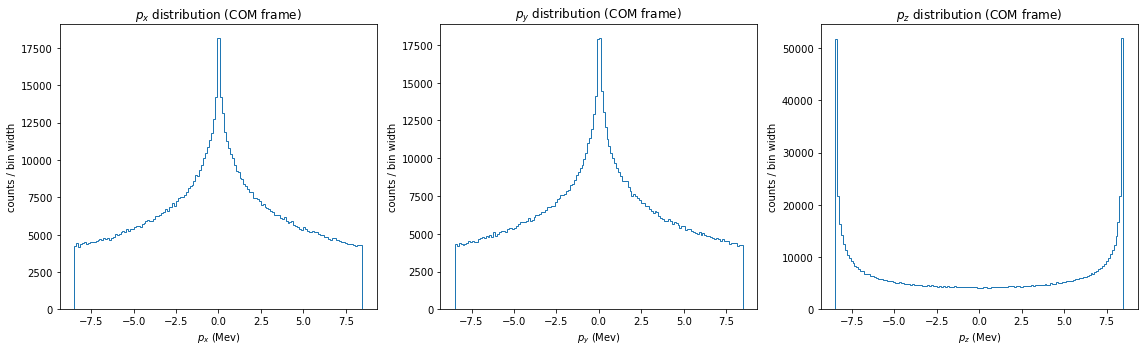

In [10]:
# Plots of the px, py and pz distributions in the COM frame

fig, (ax, ay, az) = plt.subplots(nrows=1, ncols=3, figsize=(16,5)) 
bin_counts, bin_edges, _ = ax.hist(dataset_com['px1 (MeV)'], bins=150, histtype='step')
ay.hist(dataset_com['py1 (MeV)'], bins=150, histtype='step')
az.hist(dataset_com['pz1 (MeV)'], bins=150, histtype='step')

ax.set_title(r'$p_{x}$ distribution (COM frame)')
ay.set_title(r'$p_{y}$ distribution (COM frame)')
az.set_title(r'$p_{z}$ distribution (COM frame)')

ax.set_xlabel(r'$p_{x}$ (Mev)')
ay.set_xlabel(r'$p_{y}$ (Mev)')
az.set_xlabel(r'$p_{z}$ (Mev)')

ax.set_ylabel('counts / bin width')
ay.set_ylabel('counts / bin width')
az.set_ylabel('counts / bin width')

plt.tight_layout()

At this point it is necessary to describe the process in the laboratory frame, which is the frame where the electron is at rest. 
Supposing that the positron beam propagates in the z direction, the process in the two reference frames can be represented as follows.

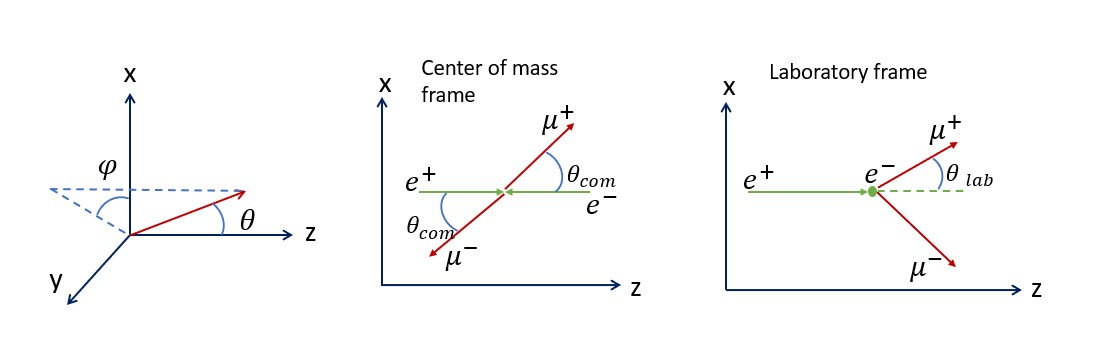

In [11]:
from IPython.display import Image
Image("Images\RF_scheme.jpg", width=950)

The transformation representing the Lorentz boost along the z direction is the following:

$$
\begin{pmatrix}
E'\\
p'_{x}\\
p'_{y}\\
p'_{z}\\
\end{pmatrix}
=
\begin{pmatrix}
\gamma & 0 & 0 & \beta \gamma\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
\beta \gamma & 0 & 0 & \gamma
\end{pmatrix}
\begin{pmatrix}
E\\
p_{x}\\
p_{y}\\
p_{z}\\
\end{pmatrix}
$$

where the ' indicates the quantities in the LAB frame and $\beta = p_{e^{+}}/E_{e^{+}}$ and $\gamma = 1 / \sqrt{1-\beta^{2}}$.

Therefore the muon momentum in the LAB frame will be:

$$
\begin{cases} 
E' = \gamma(E + \beta p_{z})\\
p'_{x} = p_{x}\\  
p'_{y} = p_{y}\\ 
p'_{z} = \gamma(\beta E + p_{z})
\end{cases}
$$

The following dataset outlines the components of the muon momenta in the LAB frame. The corresponding distributions are also plotted below.

In [12]:
# Computation of the boost:

beta = np.sqrt(E**2 - me**2) / E
gamma = 1 / np.sqrt(1-beta**2)

# First muon
px_lab1 = dataset_com['px1 (MeV)'] # the x and y components do not change
py_lab1 = dataset_com['py1 (MeV)']
pz_lab1 = gamma * (beta*dataset_com['E1 (MeV)'] + dataset_com['pz1 (MeV)']) # computation of the pz component in the lab frame starting from the pz compnent in the com frame
Emu_lab1 = gamma * (dataset_com['E1 (MeV)'] + beta * dataset_com['pz1 (MeV)']) # computation of the energy in the lab frame

# Second muon
px_lab2 = dataset_com['px2 (MeV)'] # x and y components do not change
py_lab2 = dataset_com['py2 (MeV)']
pz_lab2 = gamma * (beta*dataset_com['E2 (MeV)'] + dataset_com['pz2 (MeV)']) # computation of the pz component in the lab frame starting from the pz compnent in the com frame
Emu_lab2 = gamma * (dataset_com['E2 (MeV)'] + beta * dataset_com['pz2 (MeV)'])

# Initialization of the Data Frame:

events_lab = {'px1 (MeV)' : px_lab1, 'py1 (MeV)' : py_lab1, 'pz1 (MeV)' : pz_lab1, 'px2 (MeV)' : px_lab2, 'py2 (MeV)' : py_lab2, 'pz2 (MeV)' : pz_lab2} 
dataset_lab = pd.DataFrame(events_lab)

print('Muons momenta components in the laboratory frame:')

dataset_lab.to_csv('momenta_distribution_lab_point5.csv')

dataset_lab


Muons momenta components in the laboratory frame:


,px1 (MeV),py1 (MeV),pz1 (MeV),px2 (MeV),py2 (MeV),pz2 (MeV)
0,-8.260650,1.578728,21757.600167,8.260650,-1.578728,22218.405465
1,-8.270549,-0.952028,22326.070338,8.270549,0.952028,21649.935293
2,-6.722840,-5.111113,22154.514130,6.722840,5.111113,21821.491501
3,-1.276127,1.425117,20273.607270,1.276127,-1.425117,23702.398362
4,4.209965,3.213300,23362.655076,-4.209965,-3.213300,20613.350555
...,...,...,...,...,...,...
998306,5.938188,-3.538050,20967.877047,-5.938188,3.538050,23008.128584
998307,5.359389,-0.240592,20624.852600,-5.359389,0.240592,23351.153032
998308,-3.112588,-7.719159,21647.732908,3.112588,7.719159,22328.272723
998309,7.122908,1.683317,21098.320087,-7.122908,-1.683317,22877.685544


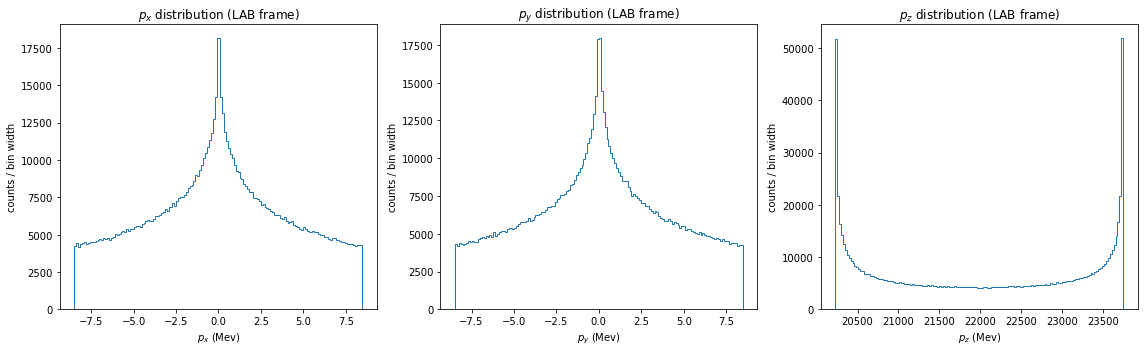

In [13]:
#Plot of the momenta distributions

fig, (ax, ay, az) = plt.subplots(nrows=1, ncols=3, figsize=(16,5)) 
bin_counts, bin_edges, _ = ax.hist(dataset_lab['px1 (MeV)'], bins=150, histtype='step')
ay.hist(dataset_lab['py1 (MeV)'], bins=150, histtype='step')
az.hist(dataset_lab['pz1 (MeV)'], bins=150, histtype='step')

ax.set_title(r'$p_{x}$ distribution (LAB frame)')
ay.set_title(r'$p_{y}$ distribution (LAB frame)')
az.set_title(r'$p_{z}$ distribution (LAB frame)')

ax.set_xlabel(r'$p_{x}$ (Mev)')
ay.set_xlabel(r'$p_{y}$ (Mev)')
az.set_xlabel(r'$p_{z}$ (Mev)')

ax.set_ylabel('counts / bin width')
ay.set_ylabel('counts / bin width')
az.set_ylabel('counts / bin width')

plt.tight_layout()

### Rescaling factor computation

The experiment is performed using as a target a 3 cm thick beryllium block hit by a beam of $10^6$ positrons per second. This section aims to calculate the number of $\mu^+ \mu^-$ events expected after one week of continuous operation in this configuration. To do this, one must first compute the total cross section of the process $e^+ + e^- \rightarrow \mu^+ + \mu^-$.

After integrating the differential cross section, the following expression is obtained:

$$
\sigma(\mu^+\mu^-) = \dfrac{\alpha^2 \pi^2}{4s} \sqrt{1 - \frac{4m_\mu ^2}{s}}\left( 3 + \frac{4m_\mu ^2}{s} \right)
$$

Here is the plot of the total cross section as a function of $\sqrt{s}$

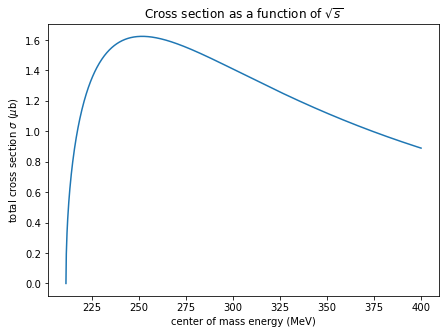

In [14]:
lattice = np.linspace(2*mmu, 400, 1000)

def sigma(E):
    return alpha**2/(4*E**2)*(np.pi**2)*np.sqrt(1 - 4*mmu**2/E**2)*(3 + 4*mmu**2/E**2)
#Here E is the COM energy, sqrt(s)

fig, ax = plt.subplots(1,1, figsize = (7,5))
ax.plot(lattice, sigma(lattice)*factor)
ax.set_xlabel('center of mass energy (MeV)')
ax.set_ylabel('total cross section $\sigma$ ($\mu$b)')
ax.set_title('Cross section as a function of $\sqrt{s}$')
plt.show()


Having obtained the total cross section, it is possible to calculate the rate of processes $e^+ + e^- \rightarrow \mu^+ + \mu^-$ using the following formula

$$
n(\mu^+\mu^-) = \phi\cdot \rho \cdot l \cdot \sigma (\mu^+\mu^-)
$$

where $\phi$ is the number of positrons per second incident on the target, $\rho$ is the desity of electrons in the beryllium, $l$ is the thickness of the target, and $\sigma$ is the cross section found above.

The following formula is used to calculate $\rho$:

$$
\rho = \dfrac{N_a}{A} \cdot d \cdot Z
$$

with $N_a$ Avogadro's number, $A$ the atomic mass of Beryllium, $d$ the density of Beryllium, and $Z$ its atomic number

In [15]:
# Calculate the density (rho) of electrons in Beryllium

Avo = 6.02 * 10**23 # Avogadro number
amu = 9.01 # Be atomic mass (u)
d = 1.848 # Be density (g/cm^3)
Z = 4 # atomic number Be

rho = (Avo/amu) * d * Z # electrons / cm^3

# Calculate the number of events per second:

flux = 10**6 # protons per second hitting the target
l = 3 #cm thickness of the target
cs = 10**(-30) * sigma(np.sqrt(s)) * factor # cross section in cm^2

n = flux * rho * l * cs # events per second

print("Number of events per second: ", n)

# Calculate the number of events that one would have during one week of continuous operations

week = 7 * 24 * 60 * 60 # one week in seconds

N = n * week # total number of events

print('Total number of events gathered in a week: ', N)

# len(theta) events were initially generated, so the rescaling factor will be

R = N / len(theta)

print('Rescaling factor: ', R)

Number of events per second:  0.5386882535517992
Total number of events gathered in a week:  325798.65574812813
Rescaling factor:  0.3263498606627876


**Simulation of the beam energy spread**

Now we simulate the energy spread of the beam and its transverse shape. Each generated event is also associated with an energy $E$ and coordinates $(x,y)$. For the latter a uniform distribution in a circle of radius 1 cm is assumed. The energy of the incoming beam follows a normal distribution with a 0.5 GeV standard deviation and centered at the nominal energy of the beam in the LAB frame. To obtain the beam nominal energy in the LAB frame it is necessary to perform a Lorentz boost starting from the nominal energy in the COM frame (212 MeV).

In [16]:
# generate uniformly distributed points on a circle of fixed radius

r = 1 # cm
n = len(theta)

# generate polar coordinate (radius and angle)
rho = np.sqrt(np.random.uniform(0, r, n))
ang = np.random.uniform(0, 2*np.pi, n) 

# define the cortesian coordinates from the polar ones
x = rho * np.cos(ang)
y = rho * np.sin(ang)

In [17]:
# compute the nominal energy of the positron beam
#s = 212**2 # MeV^2
#me = 0.511 # electron mass in MeV
E_COM = np.sqrt(s)/2 # energy of positron COM in MeV
p_COM = np.sqrt(E_COM**2 - me**2)

# defining the parameters of the Lorentz boost
beta = p_COM / (E_COM)
gamma = 1 / np.sqrt(1 - beta**2)

# the nominal energy of the positron beam is obtained
E_LAB = gamma * (E_COM + beta * p_COM) # MeV
p_LAB = gamma * (beta * E_COM + p_COM)

print('Nominal energy of the positron beam in LAB frame: %.2f GeV' % 
      (E_LAB * 10**(-3)))

Nominal energy of the positron beam in LAB frame: 43.98 GeV


Nominal energy of the beam around which the energies are spread: 43.97624790100127 GeV


,pz (GeV),E (GeV),x (cm),y (cm)
0,44.160483,44.160483,-0.000541,-0.201499
1,43.873038,43.873038,-0.720218,-0.177899
2,44.408191,44.408191,0.913051,0.123161
3,44.752837,44.752837,0.440703,-0.769010
4,43.924387,43.924387,-0.058754,-0.361488
...,...,...,...,...
998306,43.838663,43.838663,0.783711,0.208153
998307,44.398002,44.398002,-0.545097,-0.627429
998308,45.161462,45.161462,-0.275867,0.512344
998309,43.686066,43.686066,-0.721162,-0.378861


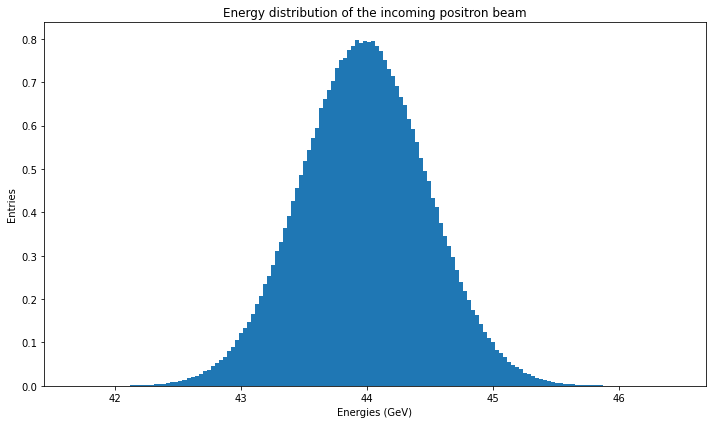

In [18]:
from scipy.stats import norm

n = len(theta)
mean = E_LAB* 10**(-3) #nominal energy of the beam in GeV
std = 0.5 # standard deviation in GeV

# generate the gaussian distribution using the scipy library
energies_LAB = norm.rvs(loc = mean, scale = std, size=n) # GeV
momenta_e_LAB = np.sqrt(energies_LAB**2 - (me * 10**(-3))**2) #GeV

positron_beam = {'pz (GeV)' : momenta_e_LAB, 'E (GeV)' :  energies_LAB}
positron_dataset = pd.DataFrame(positron_beam)
positron_dataset['x (cm)'] = x
positron_dataset['y (cm)'] = y

fig = plt.figure(figsize=(10, 6))
h, bins, _ = plt.hist(energies_LAB, bins=150, density=True)
ax = fig.axes[0]
ax.set_title('Energy distribution of the incoming positron beam')
ax.set_xlabel('Energies (GeV)')
ax.set_ylabel('Entries')
fig.tight_layout()

print('Nominal energy of the beam around which the energies are spread:', np.mean(energies_LAB), 'GeV')

positron_dataset.to_csv('positron_beam_point7.csv')

positron_dataset

Now the description of the beam energy distribution the COM frame is recovered. From this it is straightforward to obtain the momentum distribution of muons produced (again in the COM frame). Note that because of the energy spread, there will be a significant number of positrons that do not have sufficient energy to produce an event  $e^+ + e^- \rightarrow \mu^+ + \mu^-$. Then it is necessary to correct the rescaling factor found in the previous part. In fact, for a correct estimate of the expected number of events after one week of continuous operation, one must correct the rate of incident positrons capable of producing a pair $\mu^+ \mu^-$.

Nominal energy of the beam in the com around which the energies are spread: 105.99857643961968 MeV


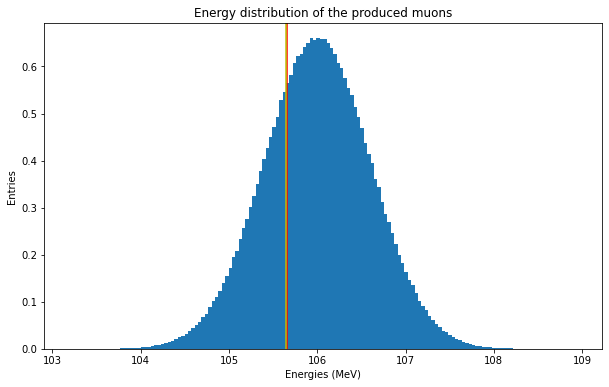

In [19]:
# define a vector for s, energies and positron momenta in COM frame

s_gauss = 2*me**2 + 2*energies_LAB*(10**3)*me #MeV 
energies_COM = np.sqrt(s_gauss) / 2 #positron/muon energy in COM
energies_selected_COM = energies_COM[energies_COM >= mmu] # I select only the energies higer then mu

momenta_e_COM = np.sqrt(energies_selected_COM**2 - me**2)
momenta_mu_COM = np.sqrt(energies_selected_COM**2 - mmu**2) #MeV
    
# define vectors of parameters of Lorentz boosts
beta_gauss = momenta_e_COM/energies_selected_COM
gamma_gauss = 1 / np.sqrt(1-beta_gauss**2)

fig = plt.figure(figsize=(10, 6)) # create the figure and the axes
h, bins, _ = plt.hist(energies_COM, bins=150, density=True)
ax = fig.axes[0]
ax.set_title('Energy distribution of the produced muons')
ax.set_xlabel('Energies (MeV)')
ax.set_ylabel('Entries')
ax.axvline(x = mmu, color = 'r')

# Here the index of the bins more closer to the value of the muon mass
index = np.where(np.abs(bins - mmu) == np.min(np.abs(bins - mmu)))[0]
ax.axvline(x = bins[index], color = 'y')

print('Nominal energy of the beam in the com around which the energies are spread:', np.mean(energies_COM), 'MeV')

In [20]:
# Here is computed the correction to the rescaling factor

bin_width = bins[1] - bins[0]
integral = bin_width * sum(h[index[0]:150])
R_new = R * integral
print("Corrected rescaling factor: ", R_new)

Corrected rescaling factor:  0.23543514596074008


In order to generate the components of the muon moments, it is first necessary to generate the angles $(\theta, \phi)$ according to the differential cross section, which depends on the Mandelstam variable $s$ (and thus on the energy in the COM).
What we did then is to divide the vector of energies in the COM into 10 bins of increasing energy, count how many events are located in each bin and generate a corresponding number of angles/events, choosing as energy the mean energy of each bin.

In [21]:
# defining a function that generates N angles as a function of the center of mass energy s

def angles_generator(mmu, s, N):
    
    # theta generation
    E = np.sqrt(s)/2 # com energy squared
    
    A = alpha**2 / (4*s)
    B = np.sqrt(1 - mmu**2/E**2)
    C = 1 + mmu**2 / E**2
    D = 1 - mmu**2 /E**2

    diff_cross_section = lambda x: A * B * (C + D * np.cos(x)**2) # differential cross section
    
    norm, err = quad(diff_cross_section, 0, np.pi) # normalization for the diff cross section

    up_lim = diff_cross_section(0)/norm # max value of the theta pdf

    # Accept-reject method:
    n = N 
    # Points generated uniformly along the horizontal axis, in [0, pi]
    h = np.random.uniform(0, np.pi, n)
    # Points generated uniformly along the vertical axis, in [0, up_lim]
    v = np.random.uniform(0, up_lim, n)
    # we only accept the values along the horizontal axis that corresponds to points along the vertical axes that are below pdf(h)
    theta = h[v < diff_cross_section(h)/norm]
    
    # phi generation
    phi = np.random.uniform(0, 2*np.pi, N)
    
    return theta, phi

In [22]:
# defining a function that generates the muon momenta components following the same procedure of the previous section

def components(theta, phi, p):
    
    px1 = p * np.sin(theta) * np.cos(phi)
    py1 = p * np.sin(theta) * np.sin(phi)
    pz1 = p * np.cos(theta)
    ptot1 = np.sqrt(px1**2 + py1**2 + pz1**2)
    Emu1 = np.sqrt(ptot1**2 + mmu**2)
    
    px2 = p * np.sin(np.pi - theta) * np.cos(np.pi + phi)
    py2 = p * np.sin(np.pi - theta) * np.sin(np.pi + phi)
    pz2 = p * np.cos(np.pi - theta)
    ptot2 = np.sqrt(px2**2 + py2**2 + pz2**2)
    Emu2 = np.sqrt(ptot2**2 + mmu**2)
    
    events = {'px1 (MeV)' : px1, 'py1 (MeV)' : py1, 'pz1 (MeV)' : pz1, 'p1 (MeV)' : ptot1, 'E1 (MeV)' : Emu1, 'px2 (MeV)' : px2, 'py2 (MeV)' : py2, 'pz2 (MeV)' : pz2, 'p2 (MeV)' : ptot2, 'E2 (MeV)' : Emu2}
    return events

In [23]:
# sorted vectors with increasing energies and momenta
energies_COM_sorted = np.sort(energies_selected_COM)
momenta_mu_COM_sorted = np.sort(momenta_mu_COM)

# defining the index corresponding to the energy closer to the energy threshold
index_min = np.where(np.abs(energies_COM_sorted - mmu) == np.min(np.abs(energies_COM_sorted - mmu)))[0] 

E_com_min = energies_COM_sorted[index_min]
E_com_max = energies_COM_sorted[-1]

divisions = 10 # energy divisions
dE = (- E_com_min + E_com_max) / divisions 

N = np.zeros(10)

# initializing an empty dataset to use concatenate in the following
event = {'px1 (MeV)' : 0, 'py1 (MeV)' : 0, 'pz1 (MeV)' : 0, 'p1 (MeV)' : 0, 'E1 (MeV)' : 0, 'px2 (MeV)' :0 , 'py2 (MeV)' : 0, 'pz2 (MeV)' : 0, 'p2 (MeV)' : 0, 'E2 (MeV)' : 0}
dataset_normal_com = pd.DataFrame(event, index=[0])

for i in range(divisions):
    
    # here I take the energies corresponding to the same division 
    E_lower = E_com_min + i*dE # min energy of the interval
    E_upper = E_com_min + (i+1)*dE #max energy of the interval
    index_lower = np.where(np.abs(energies_COM_sorted - E_lower) == np.min(np.abs(energies_COM_sorted - E_lower)))[0]
    index_upper = np.where(np.abs(energies_COM_sorted - E_upper) == np.min(np.abs(energies_COM_sorted - E_upper)))[0]

    interval_mean_E = (energies_COM_sorted[index_upper[0]] + energies_COM_sorted[index_upper][0]) / 2 # here I calculate the mean energy of the interval
    s_mean = (2*interval_mean_E)**2 # and the corresponding sqrt(s)
    N = index_upper[0] - index_lower[0] # number of events in the considered interval 
    
    t, p = angles_generator(mmu, s_mean, 2*N)
    
    theta = t[0:N] # exact number of theta in the com 
    phi = p[0:N]
    
    dataset_partial_com = pd.DataFrame(components(theta, phi, momenta_mu_COM_sorted[index_lower[0]:index_upper[0]]))
    
    if i == 9:
        N = index_upper[0] - index_lower[0] + 1 # number of events in the considered interval 
        t, p = angles_generator(mmu, s_mean, 2*N)    
        theta = t[0:N] # exact number of theta in the com 
        phi = p[0:N]
        dataset_partial_com = pd.DataFrame(components(theta, phi, momenta_mu_COM_sorted[index_lower[0]:index_upper[0]+1]))
    
    #concatenates the last generated dataframe with the previous obtained dataframe
    frames_com = [dataset_normal_com, dataset_partial_com]
    dataset_normal_com = pd.concat(frames_com, ignore_index=True)

dataset_normal_com = dataset_normal_com.drop([0]) # dropping the first row corresponding to the initialization dataframe
dataset_normal_com

,px1 (MeV),py1 (MeV),pz1 (MeV),p1 (MeV),E1 (MeV),px2 (MeV),py2 (MeV),pz2 (MeV),p2 (MeV),E2 (MeV)
1,-0.004453,0.012827,-0.004344,0.014256,105.660001,0.004453,-0.012827,0.004344,0.014256,105.660001
2,0.000044,0.000024,-0.020562,0.020562,105.660002,-0.000044,-0.000024,0.020562,0.020562,105.660002
3,-0.007350,0.020364,0.001388,0.021694,105.660002,0.007350,-0.020364,-0.001388,0.021694,105.660002
4,-0.002576,0.002049,-0.040494,0.040627,105.660008,0.002576,-0.002049,0.040494,0.040627,105.660008
5,0.007112,-0.002784,0.041639,0.042334,105.660008,-0.007112,0.002784,-0.041639,0.042334,105.660008
...,...,...,...,...,...,...,...,...,...,...
711879,-0.090699,-1.307601,25.163809,25.197923,108.623068,0.090699,1.307601,-25.163809,25.197923,108.623068
711880,-7.235615,3.559731,23.964556,25.284892,108.643276,7.235615,-3.559731,-23.964556,25.284892,108.643276
711881,4.641428,-21.711822,-12.461879,25.460646,108.684314,-4.641428,21.711822,12.461879,25.460646,108.684314
711882,5.083525,12.932489,-22.020492,26.038309,108.821088,-5.083525,-12.932489,22.020492,26.038309,108.821088


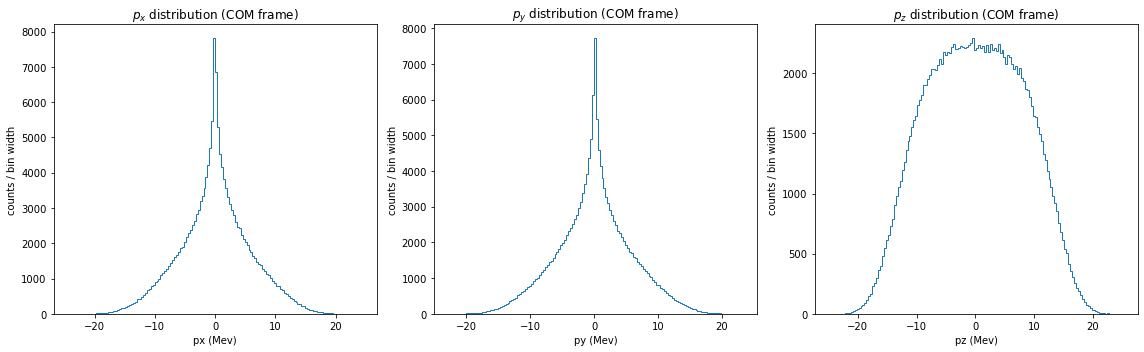

In [24]:
#Plot of the momenta coordinates after having applied the rescaling factor

(counts_x, bins_x) = np.histogram(dataset_normal_com['px1 (MeV)'], bins=150)
(counts_y, bins_y) = np.histogram(dataset_normal_com['py1 (MeV)'], bins=150)
(counts_z, bins_z) = np.histogram(dataset_normal_com['pz1 (MeV)'], bins=150)

fig, (ax, ay, az) = plt.subplots(nrows=1, ncols=3, figsize=(16,5)) 
ax.hist(bins_x[:-1], bins_x, weights=R_new*counts_x, histtype='step')
ay.hist(bins_y[:-1], bins_y, weights=R_new*counts_y, histtype='step')
az.hist(bins_z[:-1], bins_z, weights=R_new*counts_z, histtype='step')

ax.set_title(r'$p_{x}$ distribution (COM frame)')
ay.set_title(r'$p_{y}$ distribution (COM frame)')
az.set_title(r'$p_{z}$ distribution (COM frame)')

ax.set_xlabel('px (Mev)')
ay.set_xlabel('py (Mev)')
az.set_xlabel('pz (Mev)')
ax.set_ylabel('counts / bin width')
ay.set_ylabel('counts / bin width')
az.set_ylabel('counts / bin width')

plt.tight_layout()

**Possible comment**: Because of the energy spread of the beam there are many events that are exactly on the threshold, for these events the momenta are null, so for px and py there is an even higher concentration of events at 0, which was already the peak for a $sin(\theta)cos(\phi)$ distribution with uniform $\theta$ and $\phi$. A similar thing happens for pz, but the shape of the distribution is now altered considerably: for the reasons mentioned before the two peaks of the $cos(\theta)$ distribution are shifted toward zero, in addition the spread also has the effect of widening the peaks. In the final distribution the two peaks are merged into one broad peak.

As before, a Lorentz boost is performed to obtain the dataframe describing the events in the laboratory reference system. The histograms of the moment components are plotted below

In [25]:
beta = np.sort(momenta_e_COM)/energies_COM_sorted
gamma = 1 / np.sqrt(1-beta**2)

# First muon
px_lab1 = dataset_normal_com['px1 (MeV)'] 
py_lab1 = dataset_normal_com['py1 (MeV)']
pz_lab1 = gamma * (beta * dataset_normal_com['E1 (MeV)'] + dataset_normal_com['pz1 (MeV)']) 
Emu_lab1 = gamma * (dataset_normal_com['E1 (MeV)'] + beta * dataset_normal_com['pz1 (MeV)'])

#Second muon
px_lab2 = dataset_normal_com['px2 (MeV)'] 
py_lab2 = dataset_normal_com['py2 (MeV)']
pz_lab2 = gamma * (beta * dataset_normal_com['E2 (MeV)'] + dataset_normal_com['pz2 (MeV)']) 
Emu_lab2 = gamma * (dataset_normal_com['E2 (MeV)'] + beta * dataset_normal_com['pz2 (MeV)'])

#p_lab = np.sqrt(px_lab**2 + py_lab**2 + pz_lab**2) # modulus of the momentum in the lab frame
#p4_lab = np.sqrt(- px_lab**2 - py_lab**2 - pz_lab**2 + Emu_lab**2)

events_lab_new = {'px1 (MeV)' : px_lab1, 'py1 (MeV)' : py_lab1, 'pz1 (MeV)' : pz_lab1, 'px2 (MeV)' : px_lab2, 'py2 (MeV)' : py_lab2, 'pz2 (MeV)' : pz_lab2} 

dataset_normal_lab = pd.DataFrame(events_lab_new)

print('Muons momenta components in the laboratory frame:')

dataset_normal_lab.to_csv('momenta_distribution_lab_point7.csv')

dataset_normal_lab

Muons momenta components in the laboratory frame:


,px1 (MeV),py1 (MeV),pz1 (MeV),px2 (MeV),py2 (MeV),pz2 (MeV)
1,-0.004453,0.012827,21846.274480,0.004453,-0.012827,21848.070890
2,0.000044,0.000024,21842.921497,-0.000044,-0.000024,21851.424732
3,-0.007350,0.020364,21847.460307,0.007350,-0.020364,21846.886109
4,-0.002576,0.002049,21838.802633,0.002576,-0.002049,21855.548402
5,0.007112,-0.002784,21855.785490,-0.007112,0.002784,21838.566099
...,...,...,...,...,...,...
711879,-0.090699,-1.307601,28438.768013,0.090699,1.307601,17740.646283
711880,-7.235615,3.559731,28193.382874,7.235615,-3.559731,18003.215145
711881,4.641428,-21.711822,20465.242294,-4.641428,21.711822,25766.262731
711882,5.083525,12.932489,18484.549372,-5.083525,-12.932489,27863.390313


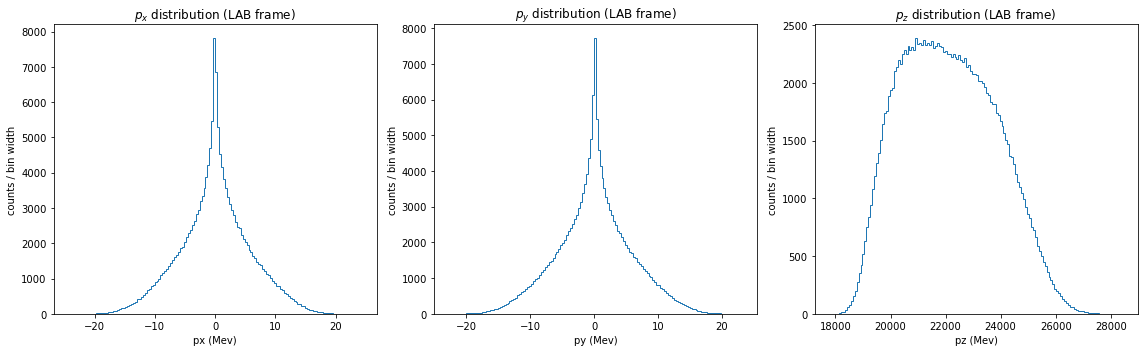

In [26]:
#Plot of the momenta coordinates after having applied the rescaling factor

(counts_x, bins_x) = np.histogram(dataset_normal_lab['px1 (MeV)'], bins=150)
(counts_y, bins_y) = np.histogram(dataset_normal_lab['py1 (MeV)'], bins=150)
(counts_z, bins_z) = np.histogram(dataset_normal_lab['pz1 (MeV)'], bins=150)

fig, (ax, ay, az) = plt.subplots(nrows=1, ncols=3, figsize=(16,5)) 
ax.hist(bins_x[:-1], bins_x, weights=R_new*counts_x, histtype='step')
ay.hist(bins_y[:-1], bins_y, weights=R_new*counts_y, histtype='step')
az.hist(bins_z[:-1], bins_z, weights=R_new*counts_z, histtype='step')

ax.set_title(r'$p_{x}$ distribution (LAB frame)')
ay.set_title(r'$p_{y}$ distribution (LAB frame)')
az.set_title(r'$p_{z}$ distribution (LAB frame)')

ax.set_xlabel('px (Mev)')
ay.set_xlabel('py (Mev)')
az.set_xlabel('pz (Mev)')
ax.set_ylabel('counts / bin width')
ay.set_ylabel('counts / bin width')
az.set_ylabel('counts / bin width')
plt.tight_layout()

### Energy loss inside the Be target

The next goal is to simulate the process taking into account the exponential loss of energy of the beam while traversing the target. As already seen, the energy of the incoming beam follows a normal distribution with $E_{mean} = 43.98 GeV $ and $\sigma = 0.5 GeV$.

In the following cell $E_0$ is the minimum initial energy of the positron beam such that each positron along all the width of the Be target has enough energy to generate muons.

In [27]:
X_0 = 35.28 #cm #Be radiation lenght (from pdg)
z0 = 3 #thickness of the target (cm)
E_0 = (43.976345468385176 + 1.5) / (np.exp(-z0/X_0))  # GeV
print('Initial nominal energy of the beam', E_0, 'GeV')

Initial nominal energy of the beam 49.512557514458216 GeV


In [28]:
# Defining a function that for a given energy interval inside the gaussian distribution generates the angles theta and phi

def angles_given_energy(E_gauss_com, N_events, mmu):
    
    
    ################# Definition of the angles generation function
    
    def angles_generator(mmu, s, Nmu):
    
        # theta generation
        E = np.sqrt(s)/2 # com energy squared
    
        A = alpha**2 / (4*s)
        B = np.sqrt(1 - mmu**2/E**2)
        C = 1 + mmu**2 / E**2
        D = 1 - mmu**2 /E**2

        diff_cross_section = lambda x: A * B * (C + D * np.cos(x)**2) # differential cross section
    
        norm, err = quad(diff_cross_section, 0, np.pi) # normalization for the diff cross section

        up_lim = diff_cross_section(0)/norm # max value of the theta pdf

        # Accept-reject method:
        n = Nmu 
        # Points generated uniformly along the horizontal axis, in [0, pi]
        h = np.random.uniform(0, np.pi, n)
        # Points generated uniformly along the vertical axis, in [0, up_lim]
        v = np.random.uniform(0, up_lim, n)
        # we only accept the values along the horizontal axis that corresponds to points along the vertical axes that are below pdf(h)
        t = h[v < diff_cross_section(h)/norm] # angle theta
    
        # phi generation
        p = np.random.uniform(0, 2*np.pi, Nmu)
    
        return t, p
    
    #################
    
    
    index_min = np.where(np.abs(E_gauss_com - mmu) == np.min(np.abs(E_gauss_com - mmu)))[0] 

    E_com_min = E_gauss_com[index_min]
    E_com_max = E_gauss_com[-1]

    divisions = 5 # in this way we do steps of 3 microm each
    dE = (- E_com_min + E_com_max) / divisions 

    N = np.zeros(divisions)

    for i in range(divisions):
    
        # here I take the energies corresponding to the same division 
        E_lower = E_com_min + i*dE # min energy of the interval
        E_upper = E_com_min + (i+1)*dE #max energy of the interval
        index_lower = np.where(np.abs(E_gauss_com - E_lower) == np.min(np.abs(E_gauss_com - E_lower)))[0]
        index_upper = np.where(np.abs(E_gauss_com - E_upper) == np.min(np.abs(E_gauss_com - E_upper)))[0]

        interval_mean_E = (E_gauss_com[index_upper[0]] + E_gauss_com[index_upper][0]) / 2 # here I calculate the mean energy of the interval
        s_mean = (2*interval_mean_E)**2 # and the corresponding sqrt(s)
        N = index_upper[0] - index_lower[0] # number of events in the considered interval 
    
        t, p = angles_generator(mmu, s_mean, 2*N_events)
    
        theta = t[0:N_events] # exact number of theta in the com 
        phi = p[0:N_events]
      
        if i == divisions-1:
            N = index_upper[0] - index_lower[0] + 1 # number of events in the considered interval 
            t, p = angles_generator(mmu, s_mean, 2*N_events)    
            theta = t[0:N_events] # exact number of theta in the com 
            phi = p[0:N_events]
        
    return theta, phi
    

In [29]:
# here are defined the number of events generated at each step dz for a week of operation

def number_events_dz(E0, dz, l, flux0, nmu_sum, rho, week):
    Ez = E_0 * (np.exp((-dz * l) / X_0))
    sz = 2*me**2 + 2*Ez*(10**3)*me
    cs = 10**(-30) * sigma(np.sqrt(sz)) * factor # cross section at l
    
    flux = flux0 - N # initial flux (rate) - total rate of generated events up to this z
    nmu = flux * rho * cs * dz # rate 
    Nmu = week * nmu # time x rate => number of events
    return Nmu, sz, nmu

In [30]:
# same function used before to generates the muons components

def components(theta, phi, p):
    
    px1 = p * np.sin(theta) * np.cos(phi)
    py1 = p * np.sin(theta) * np.sin(phi)
    pz1 = p * np.cos(theta)
    ptot1 = np.sqrt(px1**2 + py1**2 + pz1**2)
    Emu1 = np.sqrt(ptot1**2 + mmu**2)
    
    px2 = p * np.sin(np.pi - theta) * np.cos(np.pi + phi)
    py2 = p * np.sin(np.pi - theta) * np.sin(np.pi + phi)
    pz2 = p * np.cos(np.pi - theta)
    ptot2 = np.sqrt(px2**2 + py2**2 + pz2**2)
    Emu2 = np.sqrt(ptot2**2 + mmu**2)
    
    events = {'px1 (MeV)' : px1, 'py1 (MeV)' : py1, 'pz1 (MeV)' : pz1, 'p1 (MeV)' : ptot1, 'E1 (MeV)' : Emu1, 'px2 (MeV)' : px2, 'py2 (MeV)' : py2, 'pz2 (MeV)' : pz2, 'p2 (MeV)' : ptot2, 'E2 (MeV)' : Emu2}
    return events

In [31]:
# function that generates the gaussian distribution in the lab frame and then calculates the conversion from the lab frame to the com frame 

def conv_lab_to_com(sz, Nmu, me, mu):
    
    # Introduction of the gaussian distribution in the lab frame:
    E_mean_lab = (sz - 2*me**2) / (2*me)
    E_gauss_lab = norm.rvs(loc = E_mean_lab, scale = 500, size=Nmu) # GeV vector with Nmu positron energies in the lab frame
    p_gauss_lab = np.sqrt(E_gauss_lab**2 - me**2) # normally distributed momenta of positrons in the lab frame 
    
    # each event has a different energy, thus a different invariant mass, thus a different gamma and beta factor
    si = 2*me**2 + 2*E_gauss_lab*me 
    E_gauss_com = np.sort(np.sqrt(si)/2)
    p_gauss_com_e = np.sort(np.sqrt(E_gauss_com**2 - me**2))
    p_gauss_com_mu = np.sort(np.sqrt(E_gauss_com**2 - mu**2))
    
    betai = p_gauss_com_e/E_gauss_com
    gammai = 1 / np.sqrt(1-betai**2)
    
    return E_gauss_com, p_gauss_com_mu, betai, gammai


In [32]:
# function to convert from the COM to the LAB frame

def conv_com_to_lab(betai, gammai, dataset_z_partial, me, mu):
    
    # First muon
    px_lab1 = dataset_z_partial['px1 (MeV)'] 
    py_lab1 = dataset_z_partial['py1 (MeV)']
    pz_lab1 = gammai * (betai * dataset_z_partial['E1 (MeV)'] + dataset_z_partial['pz1 (MeV)']) 
    Emu_lab1 = gammai * (dataset_z_partial['E1 (MeV)'] + betai * dataset_z_partial['pz1 (MeV)'])

    #Second muon
    px_lab2 = dataset_z_partial['px2 (MeV)'] 
    py_lab2 = dataset_z_partial['py2 (MeV)']
    pz_lab2 = gammai * (betai * dataset_z_partial['E2 (MeV)'] + dataset_z_partial['pz2 (MeV)']) 
    Emu_lab2 = gammai * (dataset_z_partial['E2 (MeV)'] + betai * dataset_z_partial['pz2 (MeV)'])

    events_z_lab = {'px1 (MeV)' : px_lab1, 'py1 (MeV)' : py_lab1, 'pz1 (MeV)' : pz_lab1, 'E1 (MeV)' : Emu_lab1, 'px2 (MeV)' : px_lab2, 'py2 (MeV)' : py_lab2, 'pz2 (MeV)' : pz_lab2, 'E2 (MeV)' : Emu_lab2} 
    return events_z_lab

In [33]:
rho = (Avo/amu) * d * Z # Be density electrons / cm^3 

s0 = np.sqrt(2*me**2 + 2*E_0*(10**3)*me) # initial com energy sqrt(s0) 
flux0 = 10**6 # initial protons per second hitting the target

# definition of an 'empty' dataframe
events_com = {'px1 (MeV)' : 0, 'py1 (MeV)' : 0, 'pz1 (MeV)' : 0, 'p1 (MeV)' : 0, 'E1 (MeV)' : 0, 'px2 (MeV)' :0 , 'py2 (MeV)' : 0, 'pz2 (MeV)' : 0, 'p2 (MeV)' : 0, 'E2 (MeV)' : 0}
dataset_z_com = pd.DataFrame(events_com, index=[0])

events_lab = {'px1 (MeV)' : 0, 'py1 (MeV)' : 0, 'pz1 (MeV)' : 0, 'E1 (MeV)' : 0, 'px2 (MeV)' :0 , 'py2 (MeV)' : 0, 'pz2 (MeV)' : 0, 'E2 (MeV)' : 0}
dataset_z_lab = pd.DataFrame(events_lab, index=[0])

steps = 10 # in this way we do steps of 3 microm each
dz = z0 / steps

Nmu = np.zeros(steps) # number of events
nmu = np.zeros(steps) # events rate

for l in range(steps):
    
    nmu_sum = np.sum(nmu) # somma degli eventi generati fino allo step l-1
    Nmu[l], sz, nmu[l] = number_events_dz(E_0, dz, l, flux0, nmu_sum, rho, week) # eventi generati allo step l
    
    # generates the correct number of momenta and conversion factors
    E_gauss_com, p_com_gauss, betai, gammai = conv_lab_to_com(sz, int(Nmu[l]), me, mmu) # p_com is a vector with normally distributed values in the com
    
    theta, phi = angles_given_energy(E_gauss_com, int(Nmu[l]), mmu) # generates more angle then needed in the com frame 
    
    # IN COM FRAME
    # generate a partial dataframe at each step z and then concatenates all the dataframes togheter 
    dataset_z_partial_com = pd.DataFrame(components(theta, phi, p_com_gauss))
    
    #concatenates the last generated dataframe with the previous obtained dataframe
    frames_com = [dataset_z_com, dataset_z_partial_com]
    dataset_z_com = pd.concat(frames_com, ignore_index=True)
    
    # IN LAB FRAME
    dataset_z_partial_lab = pd.DataFrame(conv_com_to_lab(betai, gammai, dataset_z_partial_com, me, mmu))
    
    #concatenates the last generated dataframe with the previous obtained dataframe
    frames_lab = [dataset_z_lab, dataset_z_partial_lab]
    dataset_z_lab = pd.concat(frames_lab, ignore_index=True)


print('The events at each step dz are:', Nmu)

print('The events in the com frame are: ')
dataset_z_com = dataset_z_com.drop([0])
dataset_z_com = dataset_z_com.dropna()
dataset_z_com

     

The events at each step dz are: [120496.81993585 117792.57913364 114843.71633064 111622.84909812
 108097.08963859 104226.26284448  99960.28692545  95235.1731998
  89966.62557891  84039.18442905]
The events in the com frame are: 


,px1 (MeV),py1 (MeV),pz1 (MeV),p1 (MeV),E1 (MeV),px2 (MeV),py2 (MeV),pz2 (MeV),p2 (MeV),E2 (MeV)
1,-14.115318,4.364894,-27.307516,31.048268,110.127338,14.115318,-4.364894,27.307516,31.048268,110.127338
2,17.165897,-8.123561,-24.691120,31.149826,110.156013,-17.165897,8.123561,24.691120,31.149826,110.156013
3,10.859009,11.341777,26.931476,31.174643,110.163034,-10.859009,-11.341777,-26.931476,31.174643,110.163034
4,24.264219,19.336584,3.833574,31.262631,110.187965,-24.264219,-19.336584,-3.833574,31.262631,110.187965
5,1.211149,4.965295,-31.005411,31.423821,110.233807,-1.211149,-4.965295,31.005411,31.423821,110.233807
...,...,...,...,...,...,...,...,...,...,...
1046272,12.372789,-9.811950,-28.418222,32.510853,110.548592,-12.372789,9.811950,28.418222,32.510853,110.548592
1046273,-5.982909,15.051937,28.199361,32.520147,110.551326,5.982909,-15.051937,-28.199361,32.520147,110.551326
1046274,3.829906,5.082565,31.957180,32.584690,110.570329,-3.829906,-5.082565,-31.957180,32.584690,110.570329
1046275,-0.048073,-10.690573,30.897647,32.694881,110.602852,0.048073,10.690573,-30.897647,32.694881,110.602852


In [34]:
print('The events generated in the lab are:')

dataset_z_lab = dataset_z_lab.drop([0])
dataset_z_lab = dataset_z_lab.dropna()
dataset_z_lab

The events generated in the lab are:


,px1 (MeV),py1 (MeV),pz1 (MeV),E1 (MeV),px2 (MeV),py2 (MeV),pz2 (MeV),E2 (MeV)
1,-14.115318,4.364894,17848.524248,17848.843104,14.115318,-4.364894,29618.794649,29618.986795
2,17.165897,-8.123561,18423.368624,18423.681395,-17.165897,8.123561,29068.673335,29068.871567
3,10.859009,11.341777,29555.022519,29555.215559,-10.859009,-11.341777,17943.073055,17943.391019
4,24.264219,19.336584,24586.440002,24586.686614,-24.264219,-19.336584,22933.157313,22933.421703
5,1.211149,4.965295,17091.031554,17091.358920,-1.211149,-4.965295,30468.113521,30468.297158
...,...,...,...,...,...,...,...,...
1046272,12.372789,-9.811950,17767.644292,17767.965474,-12.372789,9.811950,30063.512749,30063.702570
1046273,-5.982909,15.051937,30017.498526,30017.688854,5.982909,-15.051937,17816.024037,17816.344711
1046274,3.829906,5.082565,30839.888385,30840.070041,-3.829906,-5.082565,17010.080500,17010.409847
1046275,-0.048073,-10.690573,30626.669491,30626.853617,0.048073,10.690573,17251.452917,17251.779795


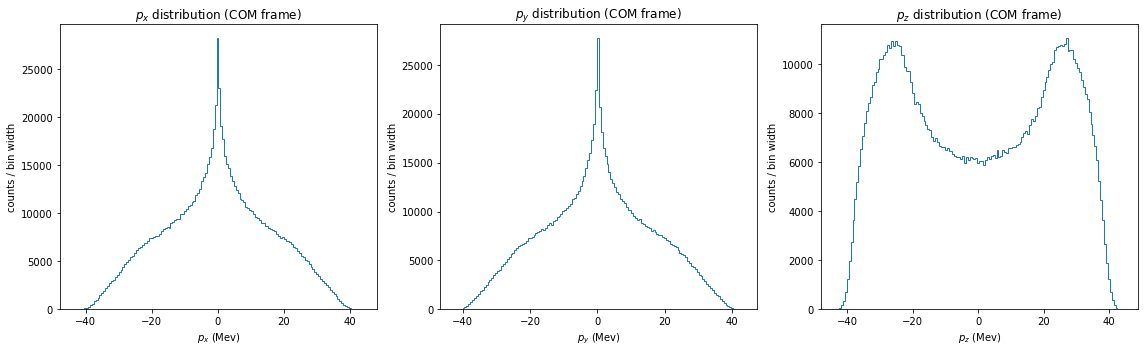

In [35]:
fig, (ax, ay, az) = plt.subplots(nrows=1, ncols=3, figsize=(16,5)) 
bin_counts, bin_edges, _ = ax.hist(dataset_z_com['px1 (MeV)'], bins=150, histtype='step')
ay.hist(dataset_z_com['py1 (MeV)'], bins=150, histtype='step')
az.hist(dataset_z_com['pz1 (MeV)'], bins=150, histtype='step')

ax.set_title(r'$p_{x}$ distribution (COM frame)')
ay.set_title(r'$p_{y}$ distribution (COM frame)')
az.set_title(r'$p_{z}$ distribution (COM frame)')

ax.set_xlabel(r'$p_{x}$ (Mev)')
ay.set_xlabel(r'$p_{y}$ (Mev)')
az.set_xlabel(r'$p_{z}$ (Mev)')

ax.set_ylabel('counts / bin width')
ay.set_ylabel('counts / bin width')
az.set_ylabel('counts / bin width')

plt.tight_layout()

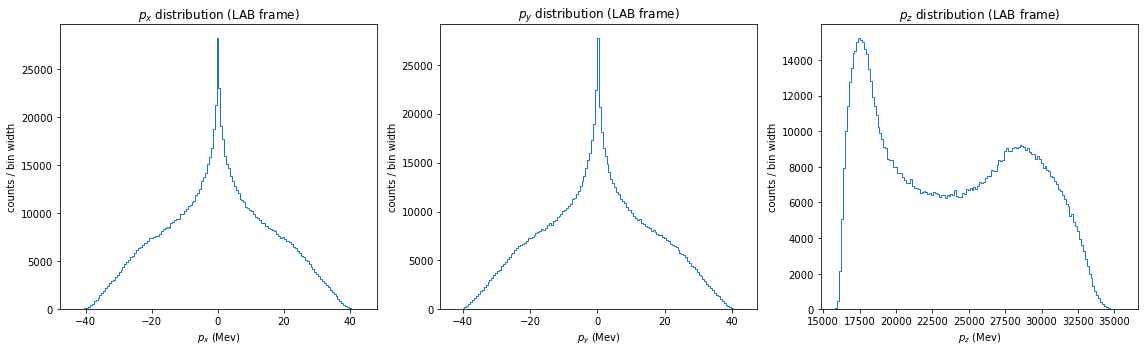

In [36]:
fig, (ax, ay, az) = plt.subplots(nrows=1, ncols=3, figsize=(16,5)) 
bin_counts, bin_edges, _ = ax.hist(dataset_z_lab['px1 (MeV)'], bins=150, histtype='step')
ay.hist(dataset_z_lab['py1 (MeV)'], bins=150, histtype='step')
az.hist(dataset_z_lab['pz1 (MeV)'], bins=150, histtype='step')

ax.set_title(r'$p_{x}$ distribution (LAB frame)')
ay.set_title(r'$p_{y}$ distribution (LAB frame)')
az.set_title(r'$p_{z}$ distribution (LAB frame)')

ax.set_xlabel(r'$p_{x}$ (Mev)')
ay.set_xlabel(r'$p_{y}$ (Mev)')
az.set_xlabel(r'$p_{z}$ (Mev)')

ax.set_ylabel('counts / bin width')
ay.set_ylabel('counts / bin width')
az.set_ylabel('counts / bin width')

plt.tight_layout()